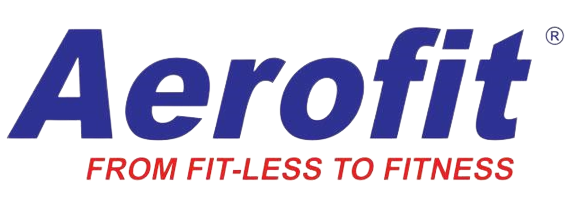

#**1. INTRODUCTION**

Aerofit is an Indian brand specializing in fitness equipment, offering a wide range of products including treadmills, elliptical trainers, and exercise bikes. The brand caters to both home and commercial fitness needs across India. Aerofit traces its roots to M/s. Sachdev Sports Co, established in 1928.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statistics import mode
from collections import Counter
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
!gdown 1Z57F39vB12XVDhp52bJielCQ4n0ms73tHYg-2rW2kbU

Downloading...
From (original): https://drive.google.com/uc?id=1Z57F39vB12XVDhp52bJielCQ4n0ms73tHYg-2rW2kbU
From (redirected): https://docs.google.com/spreadsheets/d/1Z57F39vB12XVDhp52bJielCQ4n0ms73tHYg-2rW2kbU/export?format=xlsx
To: /content/Aerofit.xlsx
11.7kB [00:00, 26.7MB/s]


In [3]:
df = pd.read_excel('Aerofit.xlsx')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# **DATA DESCRIPTION**

**DATA TYPES:**

The data type of each series in the dataset is determined below.
"int64" resembles numerical variables in the dataframe whereas "object" denotes categorical variables or string data.

In [4]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


**SHAPE OF DATA:**

The shape of the data is 180 rows and 9 columns, determined below.

In [5]:
df.shape

(180, 9)

**DATA INFO:**

The dataset consists of 180 customer records with 9 attributes each, all of which are complete (no missing data).

It includes both categorical and numerical variables, suitable for mixed-type analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**DATA COUNT:**

The unique count of values under each attribute in the data is determined below.

In [7]:
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


**DATA DISTRIBUTION:**

This data shows customers are mostly in their late 20s to early 30s, with a median income around $50,000 and usage averaging 3–4 times per week.
Fitness levels, usage frequency, and treadmill miles are moderately spread, indicating a diverse range of customer activity levels given below.

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**DATA DISTRBUTION (INCLUDES ALL DATA TYPES):**

This data includes both numeric and categorical data, with 'KP481' being the most frequently purchased product and 'Male' the most common gender.Numeric fields like income and miles show considerable spread. Also a dominant ratio of 'Partnered' customers is seen determinig categorical features.

In [9]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**DATA DISTRIBUTION (INCLUDES ONLY OBJECT):**

Among the 3 products, KP481 is the most frequently purchased, while most customers are male and partnered.
Categorical data is well-balanced with clear dominant categories, which can help in segmenting customers.

In [10]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**DUPLICATE ENTRIES:**

This data contains no duplicate entries.

In [11]:
df.duplicated().sum()

np.int64(0)

**NULL ENTRIES:**

There are no null entries in this dataset.

In [12]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


#**OUTLIER DETECTION**

**AGE OUTLIERS:**

Only 5 customers have ages considered outliers, indicating the customer age distribution is fairly consistent. These outliers represent edge cases such as users above age 45 years that maybe potentially useful for niche targeting or exclusion from general analysis.

In [13]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_age = df[(df['Age'] < lower) | (df['Age'] > upper)]
print(f"Outliers in Age: {len(outliers_age)} rows")
outliers_age[['Age', 'Product', 'Gender']]

Outliers in Age: 5 rows


,Age,Product,Gender
78,47,KP281,Male
79,50,KP281,Female
139,48,KP481,Male
178,47,KP781,Male
179,48,KP781,Male


**INCOME OUTLIERS:**

There are 19 customers whose income values are statistical outliers which majorly includes 'Male' customers, indicating the presence of unusually high earners. Income outliers reflect premium users for KP781 possibly because income significantly influences product preferences.

In [14]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_income = df[(df['Income'] < lower) | (df['Income'] > upper)]
print(f"Outliers in Income: {len(outliers_income)} rows")
outliers_income[['Income', 'Product', 'Gender']]

Outliers in Income: 19 rows


,Income,Product,Gender
159,83416,KP781,Male
160,88396,KP781,Male
161,90886,KP781,Male
162,92131,KP781,Female
164,88396,KP781,Male
166,85906,KP781,Male
167,90886,KP781,Female
168,103336,KP781,Male
169,99601,KP781,Male
170,89641,KP781,Male


**OUTLIERS IN USAGE PER WEEK:**

Here, 9 customers have slightly high usage patterns compared to others which could reflect extremely active users. Such outliers may skew average usage metrics and indicate the need for tailored engagement strategies based on expected usage levels.

In [15]:
Q1 =df['Usage'].quantile(0.25)
Q3 = df['Usage'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_usage = df[(df['Usage'] < lower) | (df['Usage'] > upper)]
print(f"Outliers in Usage: {len(outliers_usage)} rows")
outliers_usage[['Usage', 'Product', 'Gender']]

Outliers in Usage: 9 rows


,Usage,Product,Gender
154,6,KP781,Male
155,6,KP781,Male
162,6,KP781,Female
163,7,KP781,Male
164,6,KP781,Male
166,7,KP781,Male
167,6,KP781,Female
170,6,KP781,Male
175,6,KP781,Male


**FITNESS OUTLIERS:**

Only 2 customers have extremely low fitness scores, suggesting highly inactive individuals. These fitness outliers might represent niche customer segments which could possibly be beginners needing basic models.

In [16]:
Q1 = df['Fitness'].quantile(0.25)
Q3 = df['Fitness'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_fitness = df[(df['Fitness'] < lower) | (df['Fitness'] > upper)]
print(f"Outliers in Fitness: {len(outliers_fitness)} rows")
outliers_fitness[['Fitness', 'Product', 'Gender']]

Outliers in Fitness: 2 rows


,Fitness,Product,Gender
14,1,KP281,Male
117,1,KP481,Female


**OUTLIERS IN MILES RAN PER WEEK:**

A few customers expect to run or walk unusually high weekly mileage, which may reflect highly committed athletes.Product preferences among mileage outliers can guide product positioning especially high-mileeage users toward KP781.

In [17]:
Q1 = df['Miles'].quantile(0.25)
Q3 = df['Miles'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_miles = df[(df['Miles'] < lower) | (df['Miles'] > upper)]
print(f"Outliers in Miles: {len(outliers_miles)} rows")
outliers_miles[['Miles', 'Product', 'Gender']]

Outliers in Miles: 13 rows


,Miles,Product,Gender
23,188,KP281,Female
84,212,KP481,Female
142,200,KP781,Male
148,200,KP781,Female
152,200,KP781,Female
155,240,KP781,Male
166,300,KP781,Male
167,280,KP781,Female
170,260,KP781,Male
171,200,KP781,Female


**BOXPLOTS DEMONSTRATING OUTLIERS TOGETHER ACROSS THE DATA:**

The boxplots reveal several outliers across variables, particularly in Income and Miles, suggesting a few customers differ significantly from the rest in spending power or activity level.

In [18]:
continuous_vars = ['Age', 'Income', 'Usage', 'Fitness', 'Miles']

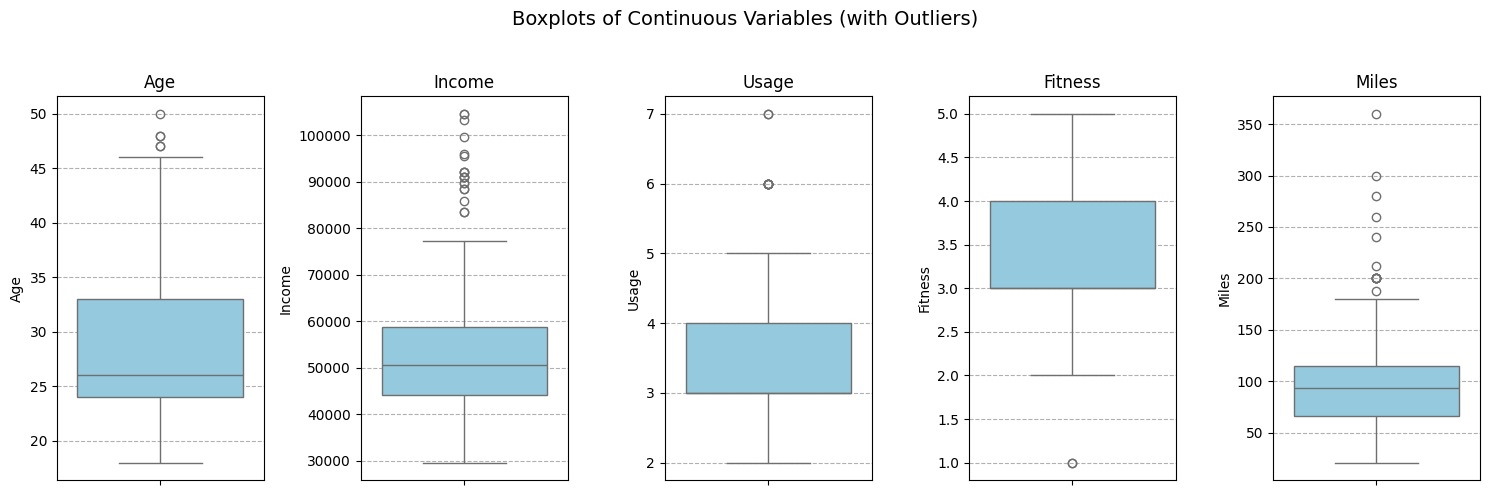

In [19]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, len(continuous_vars), i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Continuous Variables (with Outliers)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**BOXPLOTS AFTER CLIPPING THE EXTREME VALUES:**

After clipping extreme values, the boxplots show more balanced distributions, removing the influence of outliers while retaining the central trends in customer behavior.

In [20]:
df_clip = df.copy()
for col in continuous_vars:
    lower = df_clip[col].quantile(0.05)
    upper = df_clip[col].quantile(0.95)
    df_clip[col] = np.clip(df_clip[col],lower,upper)

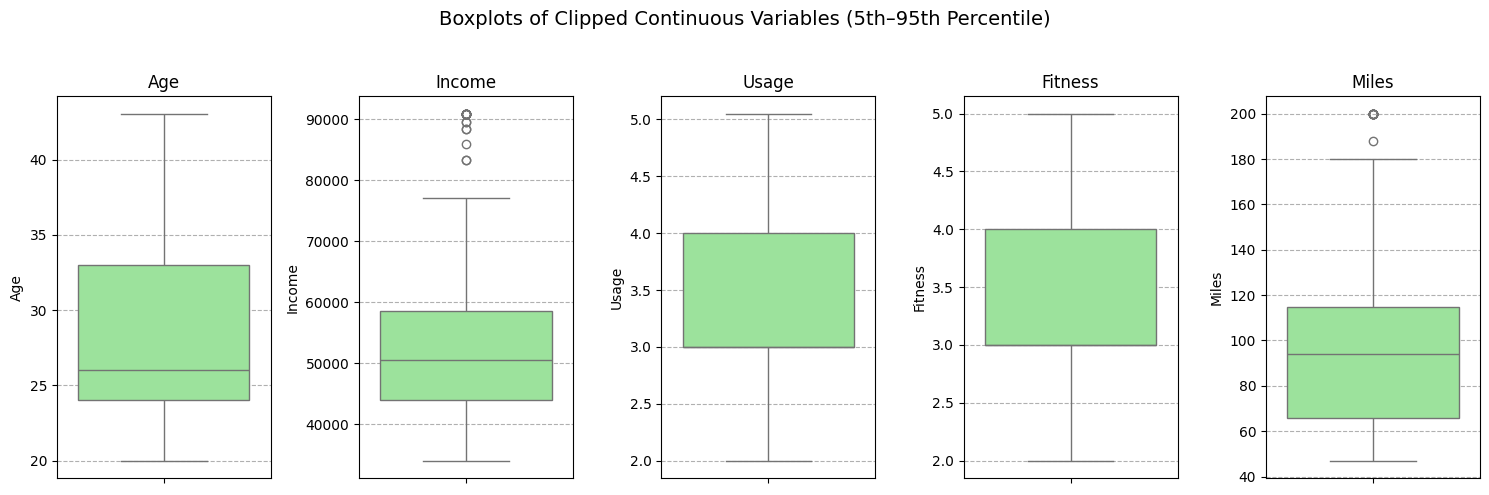

In [21]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, len(continuous_vars), i+1)
    sns.boxplot(y=df_clip[col], color='lightgreen')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Clipped Continuous Variables (5th–95th Percentile)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **DATA DISTRIBUTION VISUALS**

**AGE DEMOGRAPHICS**

**INSIGHTS:**

1. The plot highlights the age groups with the highest frequency among younger customers (typically ages ranging between 18–35). A visible peak in this range may suggest that AeroFit appeals strongly to younger, possibly health-conscious individuals.
2. This indicates that young professionals or college-age individuals are a major market segment.

**RECOMMENDATIONS:**

1. Focus advertising and social-media influencer campaigns on platforms popular with the 20–35 age group. Highlight features that appeal to convenience, performance tracking, and fitness goals.
2. Offer installment-based pricing or entry-level packages for younger buyers who may have budget constraints but are motivated to stay fit.

In [22]:
df_age = df['Age'].value_counts().sort_index()
df_age

,count
Age,
18,1
19,4
20,5
21,7
22,7
23,18
24,12
25,25
26,12


In [23]:
df_age = df_age.head(15)
df_age

,count
Age,
18,1
19,4
20,5
21,7
22,7
23,18
24,12
25,25
26,12


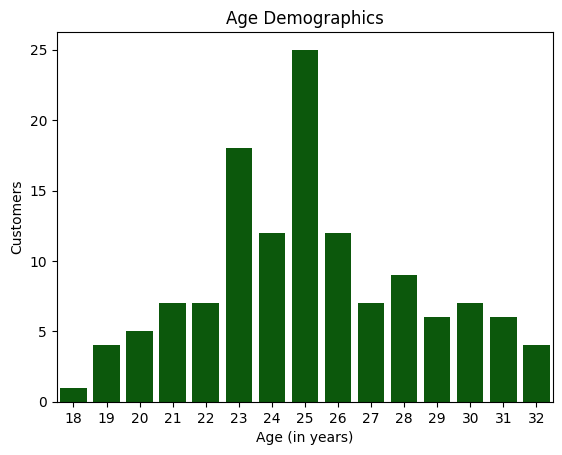

In [24]:
sns.barplot(x=df_age.index,y=df_age.values,color='darkgreen')
plt.title('Age Demographics')
plt.xlabel('Age (in years)')
plt.ylabel('Customers')
plt.show()

**PRODUCT DISTRIBUTION:**

The marginal probability distribution of customers purchasing each product model is given below with the help of crosstab and a pie-chart visual.


**INSIGHTS:**

1. KP281 likely dominates the distribution highlighting strong demand for affordable and entry=level treadmills.
2. KP781 might have the smallest share, reflecting its higher cost and niche advanced feature set.

**RECOMMENDATIONS:**

1. Increase marketing efforts for KP281, especially through budget-conscious channels, since it has the largest customer base and resonates well with entry-level users.
2. Reposition or bundle KP781 with added value (e.g., training programs or financing options) to make it more appealing, as its market share is the lowest despite offering advanced features.

In [25]:
product_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True) * 100
product_prob.columns = ['Percentage']
product_prob = product_prob.round(2)
print(product_prob)

         Percentage
Product            
KP281         44.44
KP481         33.33
KP781         22.22


In [26]:
product = df['Product'].value_counts()
product

,count
Product,
KP281,80
KP481,60
KP781,40


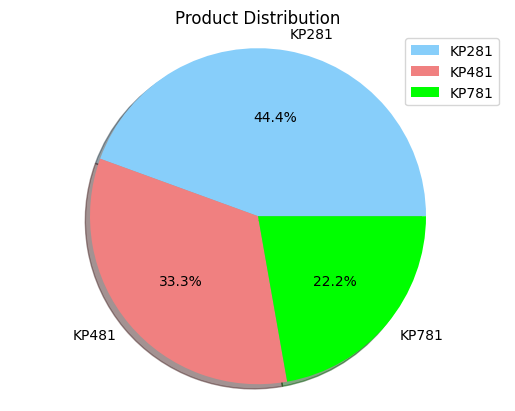

In [27]:
colors = ['lightskyblue', 'lightcoral', 'lime']
plt.pie(product,labels=product.index,colors=colors,shadow=True,autopct='%1.1f%%')
plt.title('Product Distribution')
plt.legend(labels=['KP281','KP481','KP781'], loc='upper right')
plt.axis('equal')
plt.show()

**CUSTOMER DISTRIBUTION(BASED ON GENDER)**

The distribution of customers in the data based on their gender is explained below with the help of a grouped bar chart.

**INSIGHTS:**

1. Since product KP781 has significantly more male customers than female, this suggests it might be perceived as a more advanced or performance-focused product.
2.Products KP281 or KP481 have a higher female customer base because these products may be viewed as more accessible, budget-friendly, or wellness-oriented.

**RECOMMENDATIONS:**

1. 	Target marketing by gender. Use gendered influencers or targeted ads.
2. Collect feedback and iterate on design/features.

In [28]:
gender = df['Gender'].value_counts()
products = df['Product'].value_counts()

In [29]:
gen_pro = pd.crosstab(df['Gender'],df['Product'])
gen_pro

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


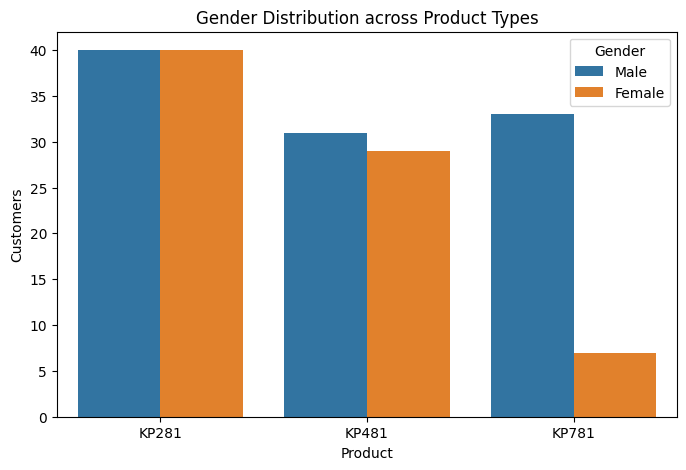

In [30]:
colors = ['lightskyblue', 'lightcoral']
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Gender Distribution across Product Types')
plt.xlabel('Product')
plt.ylabel('Customers')
plt.legend(title='Gender', labels=['Male', 'Female'],loc='upper right')
plt.show()

**MARGINAL PROBABILITY DISTRIBUTION OF CUSTOMER GENDER**

The marginal probability distribution of customer gender is clearly explained below with the help of crosstab and a pie-chart visual.

**INSIGHTS:**

1. The dataset shows that approximately 58% of customers are male and 42% are female. The slight difference suggests a mild gender skew toward male users, which is common in high-end fitness equipment.

**RECOMMENDATIONS:**

1. Considering advertisements or influencer campaigns to reach the underrepresented gender may attract more customers.
2. Designing product features based on gender trends e.g. focusing on speed and durability for males and emphasizing on design and ease of use can possibly be more profitable to increase sales.

In [31]:
gen_prob = pd.crosstab(index=df['Gender'], columns='count', normalize=True) * 100
gen_prob.columns = ['Percentage']
gen_prob = gen_prob.round(1)
print(gen_prob)

        Percentage
Gender            
Female        42.2
Male          57.8


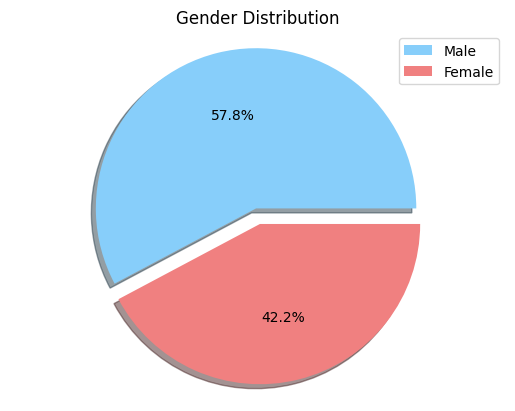

In [32]:
df_gen = df['Gender'].value_counts()
colors = ['lightskyblue', 'lightcoral']
explode = (0,0.1)
plt.pie(df_gen,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.legend(labels=['Male','Female'])
plt.show()

**CONDITIONAL PROBABILITY DISTRIBUTION OF PRODUCT PURCHASE GIVEN GENDER**

The conditional probability distribution of product purchase depending on customer gender is clearly explained below with the help of a heatmap and a grouped bar chart.

**INSIGHTS:**

1. KP781 is more popular among males which could possibly be due to more advanced or performance-oriented features that align with their fitness goals.
2. KP281 has higher purchase probability among females, suggesting they may be more value-conscious or just beginning their fitness journey.

**RECOMMENDATIONS:**

1. Offering KP781 bundles with advanced training plans, appealing to male users focused on performance could be helpful to increase sales.
2. Use gender-based insights to inform feature prioritization and design decisions for future treadmill models.

In [33]:
gender_product_prob = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
female_kp281_prob = gender_product_prob.loc['Female', 'KP281'].round(2)
male_kp281_prob = gender_product_prob.loc['Male', 'KP281'].round(2)
print("Probability of Male purchasing KP281:", male_kp281_prob)
print("Probability of Female purchasing KP281:", female_kp281_prob)

Probability of Male purchasing KP281: 38.46
Probability of Female purchasing KP281: 52.63


In [34]:
female_kp481_prob = gender_product_prob.loc['Female', 'KP481'].round(2)
male_kp481_prob = gender_product_prob.loc['Male', 'KP481'].round(2)
print("Probability of Male purchasing KP481:", male_kp481_prob)
print("Probability of Female purchasing KP481:", female_kp481_prob)

Probability of Male purchasing KP481: 29.81
Probability of Female purchasing KP481: 38.16


In [35]:
female_kp781_prob = gender_product_prob.loc['Female', 'KP781'].round(2)
male_kp781_prob = gender_product_prob.loc['Male', 'KP781'].round(2)
print("Probability of Male purchasing KP781:", male_kp781_prob)
print("Probability of Female purchasing KP781:", female_kp781_prob)

Probability of Male purchasing KP781: 31.73
Probability of Female purchasing KP781: 9.21


In [36]:
gender_prob = pd.crosstab(df['Gender'], df['Product'], normalize='index').round(2)* 100
gender_prob

Product,KP281,KP481,KP781
Gender,,,
Female,53.0,38.0,9.0
Male,38.0,30.0,32.0


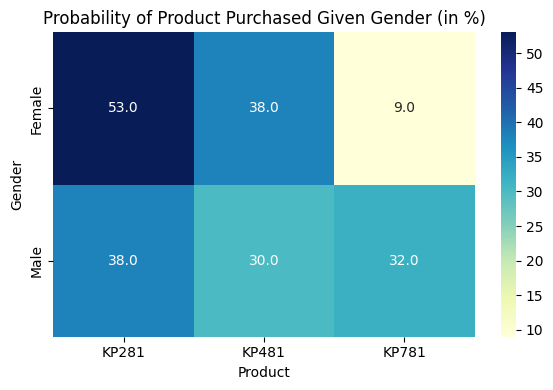

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(gender_prob, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Probability of Product Purchased Given Gender (in %)')
plt.ylabel('Gender')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

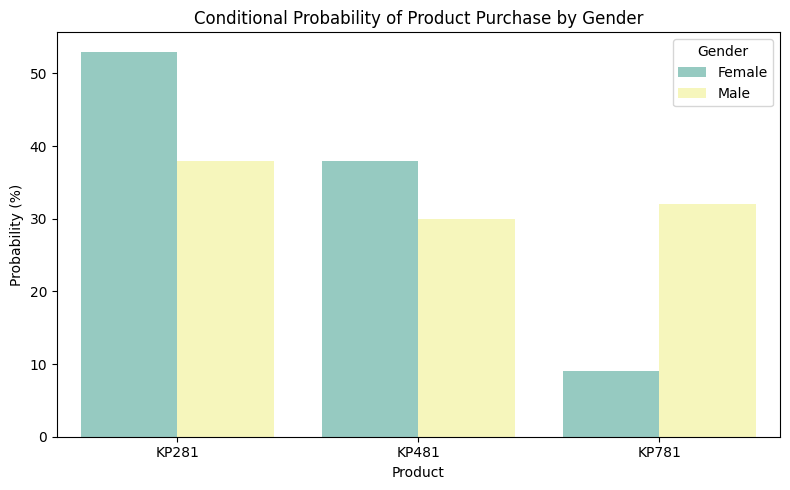

In [38]:
gender_prob_long = gender_prob.reset_index().melt(id_vars='Gender', var_name='Product', value_name='Probability')
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_prob_long, x='Product', y='Probability', hue='Gender', palette='Set3')
plt.title('Conditional Probability of Product Purchase by Gender')
plt.ylabel('Probability (%)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

**CUSTOMER DISTRIBUTION(BASED ON MARITAL STATUS)**

The customer distribution depending on their marital status in the dataset is explained below with the help of a pie chart and a grouped bar chart.

**INSIGHTS:**

1. Majority of customers are in relationships. This suggests that the product may appeal to people looking for shared health or fitness goals.
2. Partnered individuals might be more financially stable or inclined to invest in higher-end products for family/home use.

**RECOMMENDATIONS:**

1. For partnered customers, offering 2-person bundles, or discounts on a second unit could be an option.
2. For single customers, offering compact equipment, mobile apps, or solo fitness guides could be helpful.


In [39]:
marital = df['MaritalStatus'].value_counts()
marital

,count
MaritalStatus,
Partnered,107
Single,73


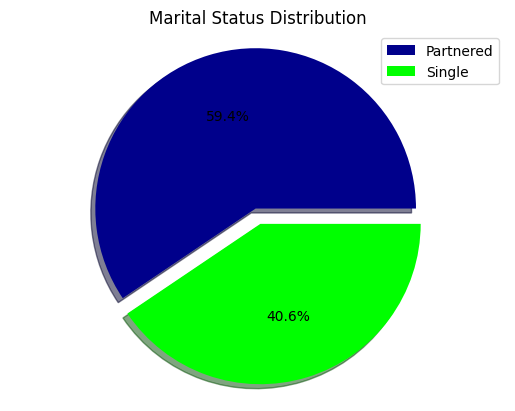

In [40]:
colors = ['darkblue', 'lime']
explode = (0,0.1)
plt.pie(marital,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.legend(labels=['Partnered','Single'])
plt.show()

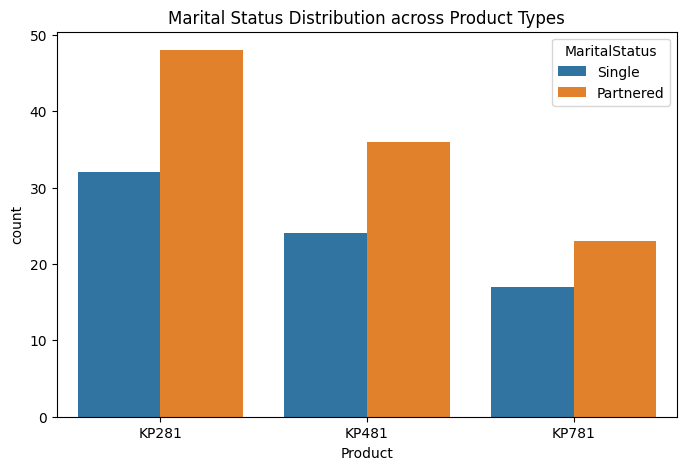

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Marital Status Distribution across Product Types')
plt.show()

**CONDITIONAL PROBABILITY DISTRIBUTION OF PRODUCT PURCHASE(BASED ON CUSTOMERS' MARITAL STATUS)**

The conditional probability distribution of product purchase given the marital status of a consumer is explained below with the help of a heatmap. The heatmap colors show how likely each marital group is to buy each product.

**INSIGHTS:**

1. Single customers mostly prefer the KP281 model likely because it's more affordable or compact.
2. Most of the singles buy KP281 which indicates price-sensitivity or space constraints.

**RECOMMENDATIONS:**

1. Consider launching entry-tier models targeted at singles.
2. Develop premium versions with partner or family-centric features.

In [42]:
marital_prob = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index').round(2) * 100
marital_prob

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,45.0,34.0,21.0
Single,44.0,33.0,23.0


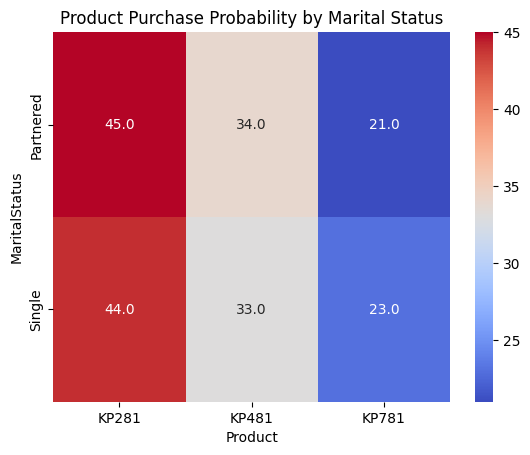

In [43]:
sns.heatmap(marital_prob, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Product Purchase Probability by Marital Status')
plt.show()

**CUSTOMER DISTRIBUTION(BASED ON EDUCATION)**

The distribution of customers in the data based on their education is explained below with the help of a barplot.

**INSIGHTS:**

1. Most customers likely have high school diplomas(12 years) or undergraduate degrees(16 years).
2. These individuals are educated enough to research products, understand benefits, and compare options. They are often working professionals, health-aware and open to lifestyle investments.

**RECOMMENDATIONS:**

1. Target ads and content to professionals with practical messaging.
2. Provide expert guides, health tips, usage tutorials.

Text(0, 0.5, 'Customers')

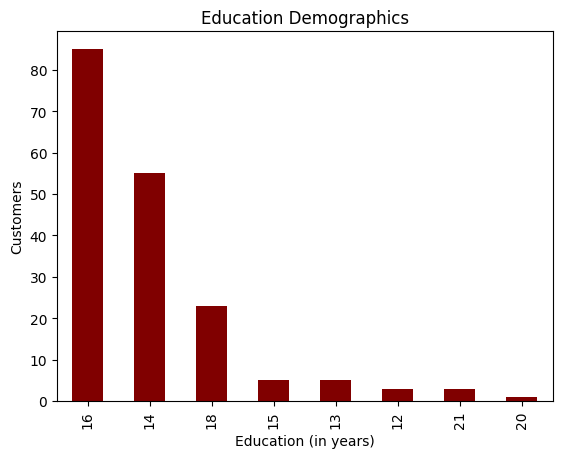

In [44]:
education = df['Education'].value_counts().plot(kind='bar',color='maroon')
plt.title('Education Demographics')
plt.xlabel('Education (in years)')
plt.ylabel('Customers')

**FREQUENCY DISTRIBUTION OF PRODUCT TYPES BASED ON EDUCATION OF CUSTOMERS**

The distribution of customer product purchase based on their education is explained below with the help of a countplot.

**INSIGHTS:**

1. KP781 is more popular among customers with higher education levels.
2. KP281 is more popular among customers with few years of education which indicates interest in affordable, easy-to-use, or no-frills models.

**RECOMMENDATIONS:**

1. Promote KP481 as the “smart choice for everyone”, highlighting its value, reliability and flexibility.
2. Highlight KP781's smart features or advanced benefits for educated buyers.

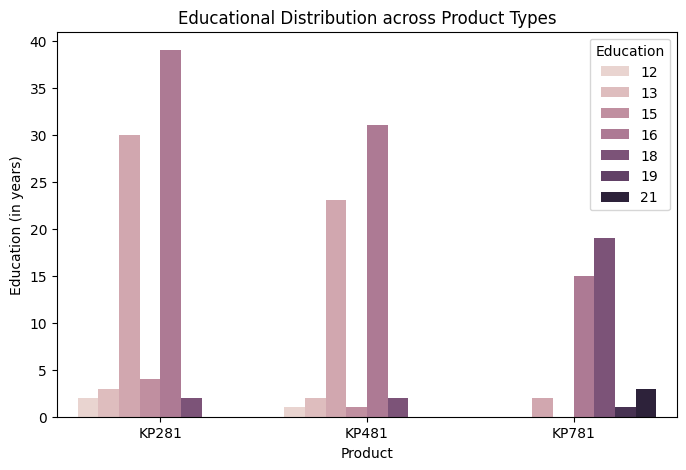

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product', hue='Education')
plt.title('Educational Distribution across Product Types')
plt.xlabel('Product')
plt.ylabel('Education (in years)')
plt.show()

**CUSTOMER FITNESS LEVEL DISTRIBUTION**

The fitness levels of customer ratings from 1 to 5 - 1 being 'Very Poor' and 5 being 'Excellent' is explained below with the help of a pie-chart.

**INSIGHTS:**

1. Most customers consider themselves “Average” in fitness while very few consider themselves as 'Excellent', 'Poor' or 'Very Poor'.
2. Most people feel they’re in okay shape – not experts, but not unfit either.

**RECOMMENDATIONS:**

1. Offer programs for all levels, especially beginners and intermediates.
2. Include adjustable workout modes, beginner guides, or progress tracking.


In [46]:
fitness = df['Fitness'].value_counts()
fitness

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


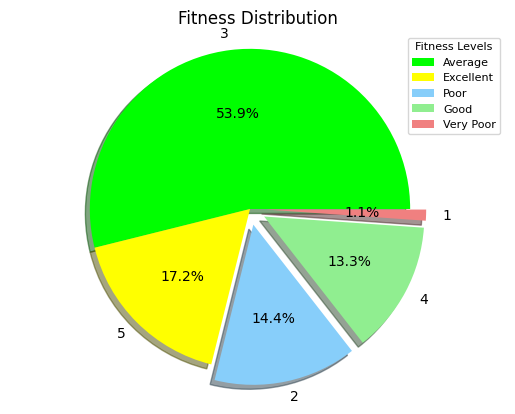

In [47]:
colors = ['lime','yellow','lightskyblue','lightgreen','lightcoral']
explode = (0,0,0.1,0.1,0.1)
plt.pie(fitness,labels=fitness.index,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Fitness Distribution')
plt.axis('equal')
plt.legend(title='Fitness Levels',labels=['Average','Excellent','Poor','Good','Very Poor'],loc='upper right',prop={'size':8},title_fontsize='8')
plt.show()

**CONDITIONAL PROBABILITY DISTRIBUTION OF PRODUCT PURCHASE(BASED ON FITNESS LEVELS)**

The conditional probability distribution of product purhcase based on customer fitness levels is explained below with the help of a heatmap.

**INSIGHTS:**

1. KP281 is chosen more by “Poor” or “Very Poor” fitness levels wich is likely due to beginner-friendly features, simplicity and affordability.
2. “Average” and “Good” fitness users often choose KP481 whereas 'Excellent' fitness users tend to choose KP781.

**RECOMMENDATIONS:**

1. Show KP281 to beginners using softer messages and promote KP781 with performance stats for athletes.
2. Emphasize KP481’s versatility and market KP781’s premium, performance features.

In [48]:
fitness_prob = pd.crosstab(df['Fitness'], df['Product'], normalize='index').round(2) * 100
fitness_prob

Product,KP281,KP481,KP781
Fitness,,,
1,50.0,50.0,0.0
2,54.0,46.0,0.0
3,56.0,40.0,4.0
4,38.0,33.0,29.0
5,6.0,0.0,94.0


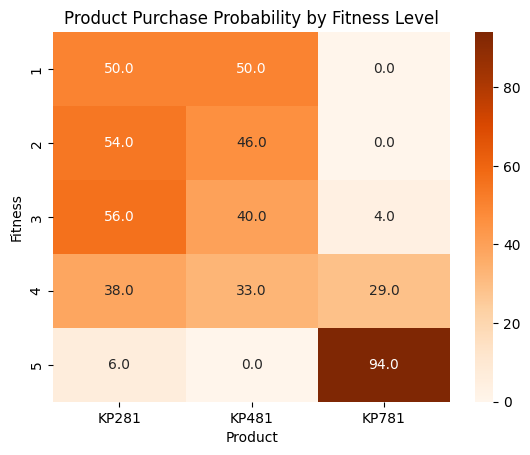

In [49]:
sns.heatmap(fitness_prob, annot=True, fmt=".1f", cmap="Oranges")
plt.title('Product Purchase Probability by Fitness Level')
plt.show()

**CUSTOMER DISTRIBUTION(BASED ON MILES RAN PER WEEK)**

The frequency of customers based on miles they run per week is explained with the help of a histogram and KDE(Kernel Density Estimate) plot.

**INSIGHTS:**

1. Most customers in this range ran 80-90 miles per week.
2. Very few users run ultra-high distances.

**RECOMMENDATIONS:**

1. High-mileage users are ideal for upselling accessories like shoes, mats, etc.
2. Improve your endurance with guided treadmill plans.

In [50]:
miles = df['Miles'].value_counts().sort_index()
miles

,count
Miles,
21,1
38,3
42,4
47,9
53,7
56,6
64,6
66,10
74,3


In [51]:
miles_40_100 = df[(df['Miles'] >= 40) & (df['Miles'] <= 100)]
miles_40_100

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
...,...,...,...,...,...,...,...,...,...
147,KP781,24,Male,18,Partnered,4,5,57271,80
153,KP781,25,Male,18,Partnered,4,3,64741,100
157,KP781,26,Female,21,Single,4,3,69721,100
160,KP781,27,Male,18,Single,4,3,88396,100


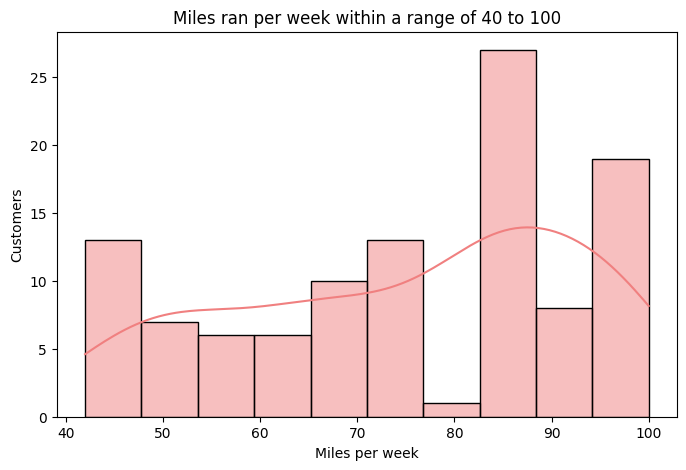

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(miles_40_100['Miles'], bins=10, kde=True, color='lightcoral')
plt.title('Miles ran per week within a range of 40 to 100')
plt.xlabel('Miles per week')
plt.ylabel('Customers')
plt.show()

**CUSTOMER DISTRIBUTION(BASED ON USAGE PER WEEK)**

The frequency distribution of usage of the treadmill by customers per week is explained below with the help of a barplot. This shows the distribution of treadmill usage frequency across the user base.

**INSIGHTS:**

1.  Most customers tend to use their treadmills 3-4 times per week which means many of them are using it ocassionally.
2. A small portion of customer base (greater than 5) are regular users.

**RECOMMENDATIONS:**

1. For users with low usage (0–2 times/week), create “Quick 15-minute workouts”.
2. For users with higher usage (4+ times/week), offer Loyalty programs, achievement badges, or discounts on accessories.

In [53]:
use = df['Usage'].value_counts().sort_index()
use

,count
Usage,
2,33
3,69
4,52
5,17
6,7
7,2


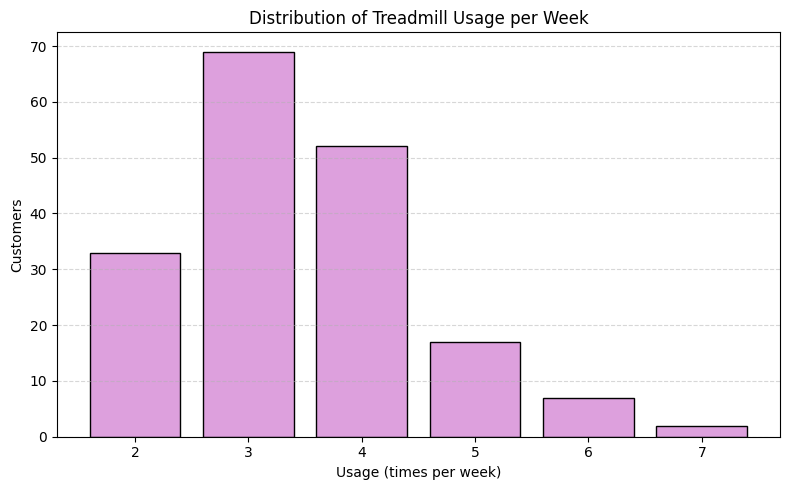

In [54]:
plt.figure(figsize=(8, 5))
plt.bar(use.index, use.values, color='plum', edgecolor='black')
plt.title('Distribution of Treadmill Usage per Week')
plt.xlabel('Usage (times per week)')
plt.ylabel('Customers')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(use.index)
plt.tight_layout()
plt.show()

**REVENUE DISTRIBUTION**

 The price of each of the treadmill is taken and the overall generated revenue is calculated in order to study the revenue each product generates. This is explained below with the help of a barplot and pie-chart.

 **Product Portfolio:**

● The KP281 is an entry-level treadmill that sells for $1,500.

● The KP481 is for mid-level runners that sell for $1,750.

● The KP781 treadmill has advanced features that sell for $2,500.

**INSIGHTS:**

1. The product that generated the most revenue isn't necessarily the most expensive one.
2. KP281 is most likely the highest revenue contributor despite having the lowest unit price.

**RECOMMENDATIONS:**

1. Boost KP781 Sales with focused premium marketing targeting athletes and high-income households and highlighting advanced performance and premium quality.
2. Market KP481 as best value, versatile choice.

In [55]:
product

,count
Product,
KP281,80
KP481,60
KP781,40


In [56]:
product = ['KP281','KP481','KP781']
price = [1500, 1750, 2500]
df_price = pd.DataFrame({'Product':product,'Price':price})
df_price

,Product,Price
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [57]:
df_merged = pd.merge(df,df_price,on='Product')
df_merged

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


In [58]:
price_map = {'KP281':1500,'KP481':1750,'KP781':2500}
df_merged['Price'] = df_merged['Product'].map(price_map)
df_merged

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


In [59]:
price_sum = df_merged.groupby('Product')['Price'].sum()
price_sum

,Price
Product,
KP281,120000
KP481,105000
KP781,100000


In [60]:
price_sum = price_sum.rename('Revenue').reset_index()
price_sum

,Product,Revenue
0,KP281,120000
1,KP481,105000
2,KP781,100000


In [61]:
total_row = pd.DataFrame([['Total Revenue', price_sum['Revenue'].sum()]], columns=['Product', 'Revenue'])
price = pd.concat([price_sum, total_row], ignore_index=True)
price

,Product,Revenue
0,KP281,120000
1,KP481,105000
2,KP781,100000
3,Total Revenue,325000


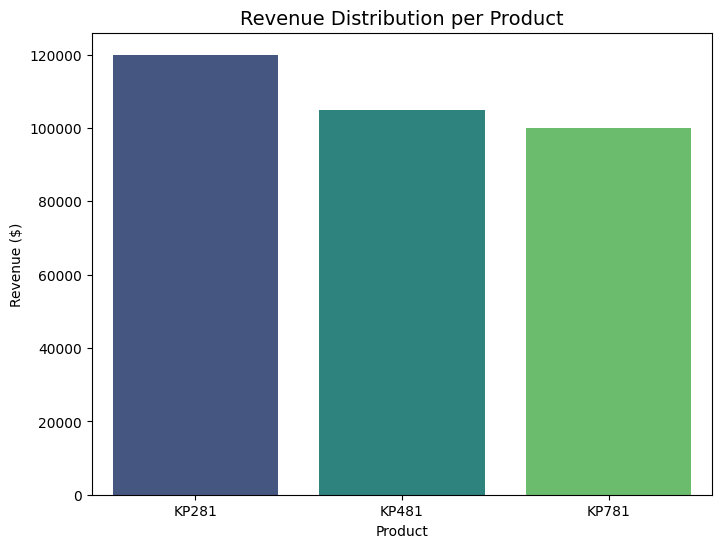

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Product', y='Revenue', data=price_sum, palette='viridis')
plt.title('Revenue Distribution per Product', fontsize=14)
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.show()

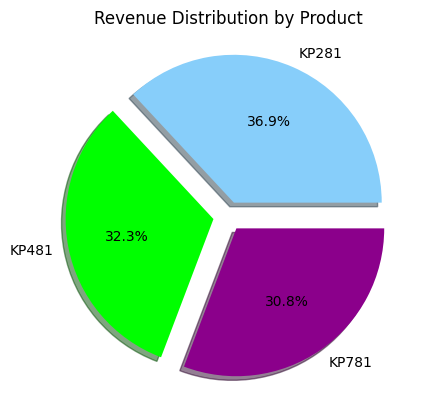

In [63]:
colors = ['lightskyblue', 'lime', 'darkmagenta']
explode = (0.1,0.1,0.1)
plt.pie(price_sum['Revenue'], labels=price_sum['Product'],colors=colors,shadow=True,explode=explode,autopct='%1.1f%%')
plt.title('Revenue Distribution by Product')
plt.show()

**CONDITIONAL PROBABILITY OF CUSTOMER AGED 18-30 WHO RUN MORE THAN 80 MILES PER WEEK**

The conditional probability distribution of a customer who ages between 18-30 years and run more than 80 miles per week is clearly explained below with the help of a pie-chart visual.

**INSIGHTS:**

1. Most of the very high-mileage runners are young adults (18–30).
2. This suggests that younger users tend to be more active or have more time/energy for extensive workouts.

**RECOMMENDATIONS:**

1. Runners logging > 80 miles likely need durable, high-performance treadmills. Match them with models like KP781.
2. Older users run less. Hence, promote comfort & low-impact features to 30+ years.

In [64]:
miles_80 = df[df['Miles'] > 80]
miles_80

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
3,KP281,19,Male,12,Single,3,3,32973,85
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [65]:
age_18_30 = miles_80[(miles_80['Age'] >=18) & (miles_80['Age']<= 30)]
age_18_30

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
3,KP281,19,Male,12,Single,3,3,32973,85
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
...,...,...,...,...,...,...,...,...,...
165,KP781,29,Male,18,Single,5,5,52290,180
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160


In [66]:
miles_80

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
3,KP281,19,Male,12,Single,3,3,32973,85
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [67]:
conditional_prob = len(age_18_30) / len(miles_80)

res = conditional_prob * 100
print("Conditional Probability: "f"{res}%")

Conditional Probability: 67.5%


In [68]:
age_18_30 = ((miles_80['Age'] >= 18) & (miles_80['Age'] <= 30)).sum()
age_other = len(miles_80) - age_18_30
age_other

np.int64(39)

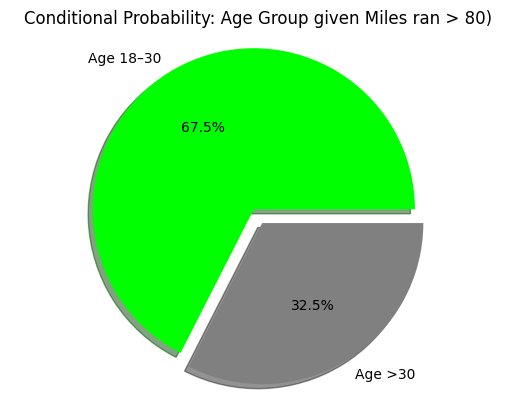

In [69]:
labels = ['Age 18–30', 'Age >30']
sizes = [age_18_30, age_other]
colors = ['lime', 'gray']
explode = (0.1,0)

plt.pie(sizes, labels=labels, colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Conditional Probability: Age Group given Miles ran > 80)')
plt.axis('equal')
plt.show()

**JOINT PROBABILITY DISTRIBUTION OF MILES AND USAGE**

The joint probability distribution of customer running more than 100 miles and using the treadmill 2-5 times per week is represented below with the help of a barplot.

**INSIGHTS:**

1. Only 31.7% users train at this intensity and frequency, even though 2–5 sessions per week is considered a moderate to high usage pattern.
2. These users are likely high-performance athletes or serious fitness enthusiasts.

**RECOMMENDATIONS:**

1. Customers who satisfy this condition should be rewarded as elite users.
2. Customers who fall out can be motivated with weekly goals and accessible features.

In [70]:
total_cust = len(df)
total_cust

180

In [71]:
condition = df[(df['Miles'] > 100) & (df['Usage'].between(2, 5))]
cust_2_5 = len(condition)
cust_2_5

57

In [72]:
probability = round(cust_2_5 / total_cust,3)
jp = probability*100
print("Joint Probability: "f"{jp}%")

Joint Probability: 31.7%


In [73]:
labels = ['Usage between 2-5 times per week','Others']
counts = [cust_2_5,total_cust - cust_2_5]

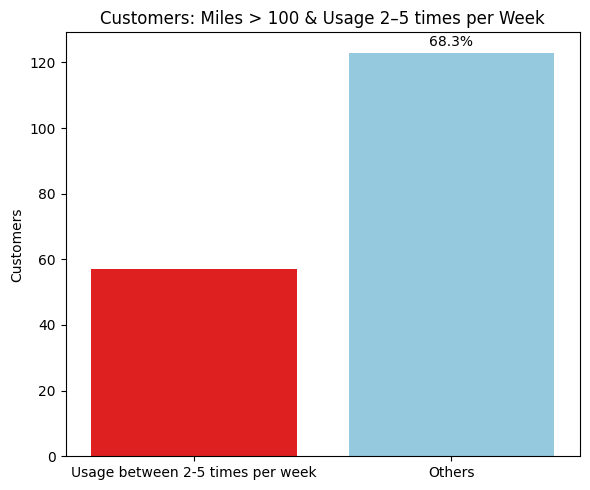

In [74]:
plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=counts, palette=['red','skyblue'])
for i, count in enumerate(counts):
    percent = (count / total_cust) * 100
plt.text(i, count + 1, f'{percent:.1f}%', ha='center', va='bottom')
plt.title('Customers: Miles > 100 & Usage 2–5 times per Week')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

**CORRELATION MATRIX**

A correlation matrix shows how strongly the pairs of numerical variables are related to each other within the data.

**INSIGHTS:**

1. Miles and Fitness show a strong positive correlation of 0.79 stating that miles ran per week influences the fitness levels of the customer.
2. Also Miles and Usage show a strong positive correlation of 0.76 stating that usage per week has a direct correlation with miles ran per week. In simple terms, higher the usage of treadmill per week will lead to increase in miles ran per week.

**RECOMMENDATIONS:**

1. Design training programs to gradually increase weekly mileage for beginners.
2. For frequent runners - offer long-distance training plans and for infrequent users - suggest short, achievable run goals.

In [75]:
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


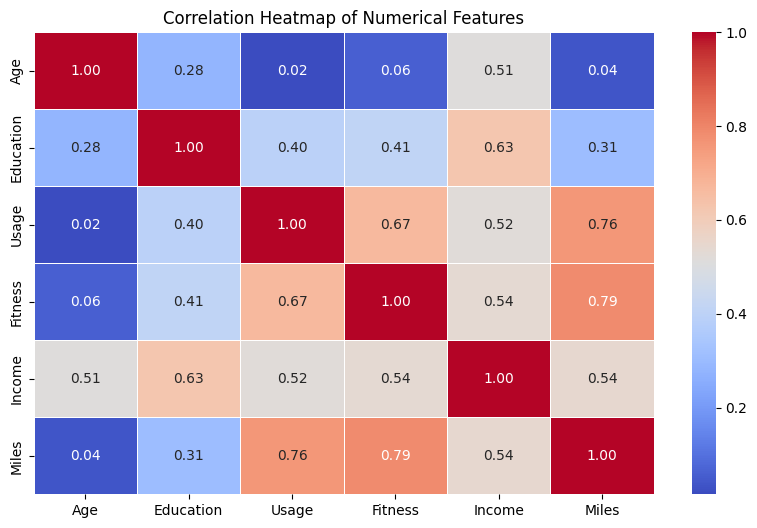

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#**CUSTOMER PROFILING**

This customer profiling summarizes key demographic, behavioral, and lifestyle characteristics for each treadmill product (KP281, KP481, KP781). It combines average numeric traits with gender and marital status distributions to better understand and target each product’s user base.


**KP281: Entry-Level Product:**
*   Adult customers(~28 years)
*   Average fitness and usage levels
*   High % of partnered users
*   Appeals to those with lower income and moderate needs

**KP481: Mid-Tier Product:**
*   Adult customers(~28 years)
*   Almost average fitness levels(~2.9) with average of 3 times/week usage
*   Slightly high % of partnered users
*   A versatile option for couples or small families

**KP781: Premium Product:**
*   Adult customers(~29 years)
*   High income group with high usage and fitness levels.
*   Majority of males and 57.5% partnered customers.

In [77]:
numeric_profile = df.groupby('Product')[['Age', 'Income', 'Usage', 'Fitness', 'Miles']].mean().round(1)
numeric_profile

,Age,Income,Usage,Fitness,Miles
Product,,,,,
KP281,28.6,46418.0,3.1,3.0,82.8
KP481,28.9,48973.6,3.1,2.9,87.9
KP781,29.1,75441.6,4.8,4.6,166.9


In [78]:
gender_profile = pd.crosstab(df['Product'], df['Gender'], normalize='index') * 100
gender_profile = gender_profile.round(1)
gender_profile.columns = [f"{col}" for col in gender_profile.columns]
gender_profile

,Female,Male
Product,,
KP281,50.0,50.0
KP481,48.3,51.7
KP781,17.5,82.5


In [79]:
marital_profile = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index') * 100
marital_profile = marital_profile.round(1)
marital_profile.columns = [f"{col}" for col in marital_profile.columns]
marital_profile

,Partnered,Single
Product,,
KP281,60.0,40.0
KP481,60.0,40.0
KP781,57.5,42.5


In [80]:
profile_summary = pd.concat([numeric_profile, gender_profile, marital_profile], axis=1)
profile_summary.reset_index(inplace=True)

In [81]:
profile_summary

,Product,Age,Income,Usage,Fitness,Miles,Female,Male,Partnered,Single
0,KP281,28.6,46418.0,3.1,3.0,82.8,50.0,50.0,60.0,40.0
1,KP481,28.9,48973.6,3.1,2.9,87.9,48.3,51.7,60.0,40.0
2,KP781,29.1,75441.6,4.8,4.6,166.9,17.5,82.5,57.5,42.5


**CUSTOMER PROFILE(VISUAL):**

The customer profile visual below contains the same information as mentioned above in the customer profile table. The bar plot gives a detailed insight for better understanding.

**RECOMMENDATIONS:**

1. Tailor marketing messages based on product profiles (e.g., performance for KP781, simplicity for KP281).
2. Bundle content or services for sales increment (eg: for KP781 - Add training programs or challenges and for KP281 - Offer beginner-friendly guides).

In [82]:
numeric_profile = df.groupby('Product')[['Age', 'Usage', 'Fitness', 'Miles']].mean().round(1)
numeric_profile_T = numeric_profile.T
numeric_profile_T

Product,KP281,KP481,KP781
Age,28.6,28.9,29.1
Usage,3.1,3.1,4.8
Fitness,3.0,2.9,4.6
Miles,82.8,87.9,166.9


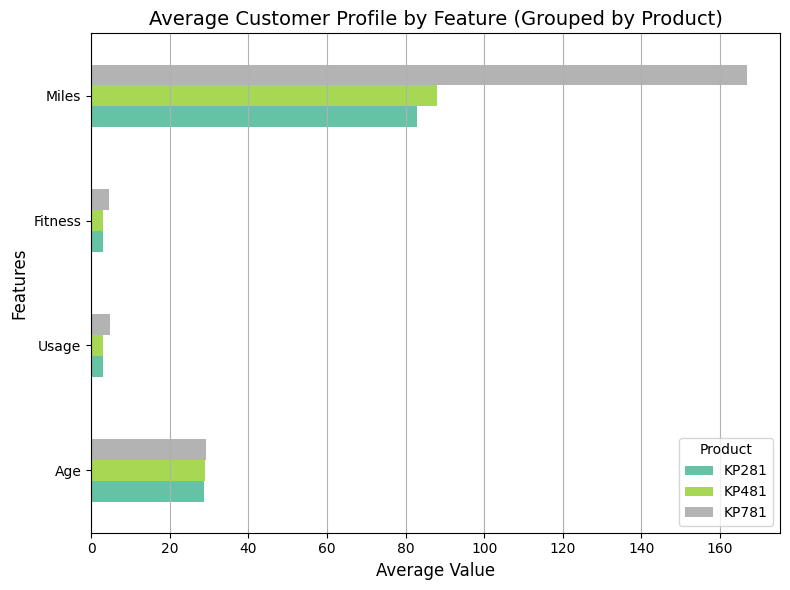

In [83]:
numeric_profile_T.plot(kind='barh',figsize=(8,6),colormap='Set2')

plt.title("Average Customer Profile by Feature (Grouped by Product)", fontsize=14)
plt.xlabel("Average Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.legend(title="Product", loc='lower right')
plt.grid(axis='x')
plt.tight_layout()

# **RECOMMENDATIONS**
To maximize market penetration and customer satisfaction, AeroFit should adopt a segmented marketing strategy: promote KP281 through affordable fitness campaigns targeting younger audiences, position KP481 as a versatile treadmill for average fitness users, and brand KP781 as a premium product for performance-driven customers. Tailoring product features, pricing strategies, and advertising channels accordingly can drive sales and improve customer alignment across all product lines.

#**CONCLUSION**

The AeroFit dataset reveals clear patterns in customer preferences based on demographic and fitness attributes. By leveraging these insights, AeroFit can effectively align its product offerings with the needs of distinct customer segments. A data-driven, targeted approach to marketing and product development will not only enhance customer satisfaction but also drive more strategic sales growth across all treadmill models.